# Mall Customer Segmentation Data

## Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Features: 
1) CustomerID : Unique ID assigned to the customer.
2) Gender: Gender of the customer.
3) Age: Age of the customer.
4) Annual Income (k$) : Annual Income of the customer.
5) Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature.
## Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
# importing required packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings  
warnings.filterwarnings("ignore")

In [2]:
# loading dataset 
mall_data=pd.read_csv("Mall_Customers.csv")

## Data preprocessing 

In [3]:
# first five rows of data 
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# total records in dataset 
print("Total records in dataset:",mall_data.shape[0])
print("Total records in dataset:",mall_data.shape[1])

Total records in dataset: 200
Total records in dataset: 5


In [5]:
# dataset information 
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for null values 
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# dropping CustomerID feature 
data=mall_data.drop(["CustomerID"],axis=1)

In [8]:
# encoding categorical data into numeric
data["Gender"]=data["Gender"].replace({"Male":0,"Female":1})

In [9]:
# scaling dataset
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale_data=scale.fit_transform(data)

In [10]:
# reducing dimessions of data using pca 
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
scale_pca=pd.DataFrame(pca.fit_transform(scale_data))
scale_pca.rename({0:"f1",1:"f2"},axis=1,inplace=True)

In [11]:
scale_pca.head()

,f1,f2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


## Model Training and Evaluation

In [12]:
# importing kmeans clustering 
from sklearn.cluster import KMeans

In [13]:
# wcss according to number of clustering 
wcss=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(scale_pca) 
    wcss.append(kmeans.inertia_)   

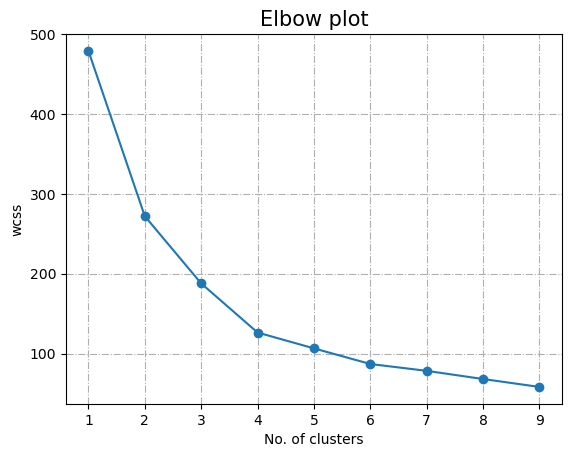

In [14]:
# elbow plot 
plt.plot(range(1,10),wcss,marker="o")
plt.title("Elbow plot",fontsize=15)
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.grid(linestyle="dashdot")
plt.show()

In [15]:
# importing kneed locator 
from kneed import KneeLocator 
kl=KneeLocator(range(1,10),wcss,curve="convex",direction="decreasing")
print("elbow point:",kl.elbow)

elbow point: 4


In [16]:
# train model with 4 clusters
kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(scale_pca)

KMeans(n_clusters=4)

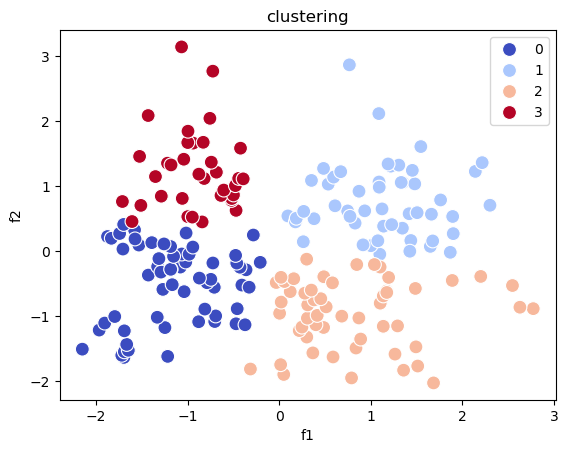

In [17]:
# Visualizing the K-Means clustering results
sns.scatterplot(scale_pca,x="f1",y="f2",hue=kmeans.labels_,s=100,palette="coolwarm")
plt.title("clustering")
plt.show()

In [18]:
# creating dataframe for clustered data
cluster_label=pd.DataFrame()
cluster_label["Labels"]=kmeans.predict(scale_pca)
cluster_label["Labels"].replace({0:"A",1:"B",2:"C",3:"D"},inplace=True)
Customer_cluster_data=pd.concat([mall_data,cluster_label],axis=1)

In [19]:
Customer_cluster_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,A
1,2,Male,21,15,81,A
2,3,Female,20,16,6,C
3,4,Female,23,16,77,A
4,5,Female,31,17,40,C


In [20]:
# saving clustered dataset
Customer_cluster_data.to_csv("Customer_cluster_data.csv",index=False)